# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

### <span style="color:darkred">Módulo II - Tratamento e limpeza de Dados</span>


### <span style="color:darkred">Avaliação com soluções</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

In [47]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn import metrics

# carregando dados
data = pd.read_csv("./dados/pib_mba_avaliacao2021.csv")
data

,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,classe,desemprego
0,215,BAHIA,Tremedal,2010,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,1,9.3
1,306,RIO GRANDE DO SUL,Turuçu,2010,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,2,4.9
2,900,ESPIRITO SANTO,Vitória,2010,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,4,8.3
3,3613,MINAS GERAIS,Jacutinga,2010,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,2,5.0
4,1028,PIAUÍ,Nazária,2010,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,1,6.8
...,...,...,...,...,...,...,...,...,...,...
5567,2102,PARÁ,Santa Maria do Pará,2010,9.988815e+04,23202,4305.149902,Produto Interno Bruto per capita,1,6.1
5568,4655,SÃO PAULO,Mineiros do Tietê,2010,9.854938e+04,12334,7990.060059,Produto Interno Bruto per capita,1,8.1
5569,1115,GOIÁS,Pirenópolis,2010,1.820774e+05,20945,8693.120117,Produto Interno Bruto per capita,1,4.2
5570,2102,PARÁ,Santa Maria do Pará,2010,9.988815e+04,23202,4305.149902,Produto Interno Bruto per capita,1,6.1


Vamos utilizar uma base de dados baixada do IBGE com o PIB per capita para cada município brasileiro, essa base foi modificada para o propósito dos exercícios abaixo e possui as seguintes colunas:
* gid - identificador geográfico do município
* UF - unidade federativa
* nome - nome do município
* Censo - ano do censo relativo aos dados
* PIB - total do PIB
* Pop_est_2009 - populacao estimada	
* PIB_percapita - PIB per capita segundo os dados
* Descrição - Descrição do dados
* classe - classe do município
* desemprego - índice de desemprego na cidade no ano do Censo


### Questão 1)

Verifique a distribuição dos valores e tipos dos atributos e realize um tratamento de dados considerando:

1. Correção dos dados que for possível inferir o valor verdadeiro, ajustando e padronizando-os. Anote em quais variáveis isso ocorreu. Valores outliers não devem ser removidos/alterados, apenas dados claramente errôneos ou não padronizados.
2. Conversão dos atributos que deveriam ser numéricos para numérico - inspecione os valores para garantir que a conversão não vá gerar dados faltantes de forma desnecessária, substituindo por numeros os que forem possíveis como por exemplo o atributo "floor" como visto na aula em que substituímos dados por 0. Anote as variáveis em que isso ocorreu.
    
Quais variáveis possuiam valores que precisaram ser padronizados ou corrigidos, e quantos valores em cada uma delas foi possível corrigir?
 
(a) UF (5) e Censo (2)<br>
(b) UF (9), Desemprego (10), Censo (3)<br>
(c) Censo (2) <br>
<font color='red'>(d) UF (9) e Censo (2)<br></font>

<font color='red'>Resposta</font>: *Ver código abaixo. Note que 2007 para Censo é um valor possível e não deve ser corrigido, já 20100 é claramente um erro de digitação e passível de correção.*

---

In [48]:
def verifica_atributos(df):
    for var in df:
        # imprime variavel e seu tipo
        print(var,":", df[var].dtype.name, end="")
        # se nao numérico
        if not np.issubdtype(df[var].dtype, np.number):
            print("\n\t",df[var].nunique(), "distintos: ", end="")
            print(df[var].unique())
        else:
            print(", intervalo: ",end="")
            print(df[var].min(), ",", df[var].max())

verifica_atributos(data)

gid : int64, intervalo: 1 , 5568
UF : object
	 33 distintos: ['BAHIA' 'RIO GRANDE DO SUL' 'ESPIRITO SANTO' 'MINAS GERAIS' 'PIAUÍ'
 'GOIÁS' 'PERNAMBUCO' 'PARÁ' 'SERGIPE' 'SÃO PAULO' 'PARAÍBA' 'TOCANTINS'
 'AMAZONAS' 'SANTA CATARINA' 'CEARÁ' 'RORAIMA' 'MARANHÃO' 'RIO DE JANEIRO'
 'MATO GROSSO' 'PARANÁ' 'ALAGOAS' 'MATO GROSSO DO SUL' 'ACRE'
 'RIO GRANDE DO NORTE' 'RONDÔNIA' 'PARANA' 'AMAPÁ' 'DISTRITO FEDERAL'
 'MINAS G.' 'R.G. DO SUL' 'SP' 'PIAU' 'PARANA ']
nome : object
	 5292 distintos: ['Tremedal' 'Turuçu' 'Vitória' ... 'Guararapes' 'Barra do Guarita'
 'Machadinho']
Censo : object
	 4 distintos: ['2010' '“2010' nan '2007' '20100']
PIB : float64, intervalo: 1.0001 , 1167951456.0
Pop_est_2009 : int64, intervalo: 837 , 11037593
PIB_percapita : float64, intervalo: 1929.9699707 , 360815.84375
Descrição : object
	 1 distintos: ['Produto Interno Bruto per capita']
classe : int64, intervalo: 1 , 5
desemprego : float64, intervalo: 1.0 , 407.0


In [49]:
# ajustando 'UF'
print(data['UF'].value_counts())

UFs_data = data['UF'].unique()
#print(data['UF'].unique())

# array com UFs válidas
UFs_valid = np.array(['BAHIA', 'RIO GRANDE DO SUL', 'ESPIRITO SANTO', 'MINAS GERAIS', 'PIAUÍ',
 'GOIÁS', 'PERNAMBUCO', 'PARÁ', 'SERGIPE', 'SÃO PAULO', 'PARAÍBA', 'TOCANTINS',
 'AMAZONAS', 'SANTA CATARINA', 'CEARÁ', 'RORAIMA', 'MARANHÃO', 'RIO DE JANEIRO',
 'MATO GROSSO', 'PARANÁ', 'ALAGOAS', 'MATO GROSSO DO SUL', 'ACRE',
 'RIO GRANDE DO NORTE', 'RONDÔNIA', 'AMAPÁ', 'DISTRITO FEDERAL'])

# listando UFs inválidas
print("UFs Inválidas: {}".format(UFs_data[~np.isin(data['UF'].unique(), UFs_valid)]))

MINAS GERAIS           852
SÃO PAULO              646
RIO GRANDE DO SUL      495
BAHIA                  417
PARANÁ                 395
SANTA CATARINA         293
GOIÁS                  247
PARAÍBA                223
PIAUÍ                  223
MARANHÃO               217
PERNAMBUCO             186
CEARÁ                  184
RIO GRANDE DO NORTE    167
PARÁ                   145
MATO GROSSO            141
TOCANTINS              139
ALAGOAS                102
RIO DE JANEIRO          92
ESPIRITO SANTO          78
MATO GROSSO DO SUL      78
SERGIPE                 75
AMAZONAS                62
RONDÔNIA                52
ACRE                    22
AMAPÁ                   16
RORAIMA                 15
PARANA                   3
SP                       2
PARANA                   1
MINAS G.                 1
PIAU                     1
DISTRITO FEDERAL         1
R.G. DO SUL              1
Name: UF, dtype: int64
UFs Inválidas: ['PARANA' 'MINAS G.' 'R.G. DO SUL' 'SP' 'PIAU' 'PARANA ']


In [50]:
# tratando casos um a um
data.loc[data['UF']=='PARANA', 'UF'] = 'PARANÁ'
data.loc[data['UF']=='PARANA ', 'UF'] = 'PARANÁ'
data.loc[data['UF']=='PIAU', 'UF'] = 'PIAUÍ'
data.loc[data['UF']=='MINAS G.', 'UF'] = 'MINAS GERAIS'
data.loc[data['UF']=='R.G. DO SUL', 'UF'] = 'RIO GRANDE DO SUL'
data.loc[data['UF']=='SP', 'UF'] = 'SÃO PAULO'

UFs_data = data['UF'].unique()
print(UFs_data[~np.isin(data['UF'].unique(), UFs_valid)])

[]


In [51]:
# ajustando 'Censo'
print(data['Censo'].value_counts())


2010     5559
2007        5
“2010       1
20100       1
Name: Censo, dtype: int64


In [52]:
data.loc[data['Censo']=='"2010', 'Censo'] = '2010'
data.loc[:,'Censo'] = pd.to_numeric(data.loc[:,'Censo'], downcast='integer', errors='coerce')
data.loc[data['Censo']==20100, 'Censo'] = 2010

# ajustando 'Censo'
print(data['Censo'].value_counts())

2010.0    5560
2007.0       5
Name: Censo, dtype: int64


### Questão 2)

Após o tratamento feito na Questão 2:
1. Remova colunas que possuam valores redundantes constantes
2. Exiba, e posteriormente remova muninícipios duplicados (considere nome e UF para esse fim), mantendo a primeira ocorrência. 

Qual o tamanho final da base de dados após esse tratamento?

(a) 5572 x 10<br>
(b) 5572 x 9<br>
(c) 5565 x 8<br>
<font color='red'>(d) 5565 x 9</font><br>

<font color='red'>Resposta</font>: *o atributo Descrição tem apenas um valor e pode ser descartado, e removendo as duplicatas, ficamos com 5565 linhas conforme código abaixo.*


---

In [53]:
# removendo a coluna descricao, pois todos os valores são iguais
data = data.drop('Descrição', axis = 1)

In [54]:
# removendo duplicatas
data[data.duplicated(['nome', 'UF'], keep="first")]

,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,classe,desemprego
2348,3474,PERNAMBUCO,Pedra,2010.0,121027.789062,20788,5822.000000,1,8.5
5462,3773,SÃO PAULO,Guapiara,2010.0,175721.890625,20927,8396.900391,1,7.2
5567,2102,PARÁ,Santa Maria do Pará,2010.0,99888.148438,23202,4305.149902,1,6.1
5568,4655,SÃO PAULO,Mineiros do Tietê,2010.0,98549.375000,12334,7990.060059,1,8.1
5569,1115,GOIÁS,Pirenópolis,2010.0,182077.437500,20945,8693.120117,1,4.2
5570,2102,PARÁ,Santa Maria do Pará,2010.0,99888.148438,23202,4305.149902,1,6.1
5571,4655,SÃO PAULO,Mineiros do Tietê,2010.0,98549.375000,12334,7990.060059,1,8.1


In [55]:
data = data.drop_duplicates(['nome', 'UF'], keep='first')
#data = data.drop_duplicates(keep='first')

In [56]:
n_tratdup = data.shape
print("Dados após tratamento %d x %d" % (n_tratdup[0], n_tratdup[1]))

Dados após tratamento 5565 x 9


---
### Questão 3)

Vamos analisar possíveis outliers. Utilize o método da análise da dispersão pelo *desvio padrão* e inspecione as colunas 'gid', 'PIB', 'Pop_est_2009', 'desemprego', procurando por outliers globais com critério de 3 desvios padrões, i.e. $3\sigma$. Nessa questão não remova outliers da base de dados, apenas identifique-os.

Quantos outliers foram encontrados, respectivamente, para 'gid', 'PIB', 'Pop_est_2009' e 'desemprego'?

(a) 0, 27, 1, 2<br>
(c) 0, 9, 44, 0<br>
(d) 1, 5, 9, 44<br>
<font color='red'>(d) 0, 5, 27, 2<br></font>


In [57]:
def remove_outliers_std(df, attributes, t):
    
    dfn = df.copy()
    
    outliers = []
    for var in attributes:
        # verifica se variável é numerica
        if np.issubdtype(df[var].dtype, np.number):
            crit_std = df[var].std() * t
            mu = df[var].mean()
            
            outl = dfn.loc[(df[var] < mu-crit_std) | (df[var] > mu+crit_std), :]
            tot_out = np.sum((df[var] < mu-crit_std) | (df[var] > mu+crit_std))
            
            # apenas inliers segundo std
            dfn = dfn.loc[(df[var] >= mu-crit_std) & (df[var] <= mu+crit_std),:]
            print('%s, mu = %.2f, std = %.2f, outliers = %d' % (var, mu, crit_std/t, tot_out))
            if tot_out > 0: outliers.append(outl)
        
    return dfn, outliers

In [58]:
d, o = remove_outliers_std(data,['gid', 'PIB', 'Pop_est_2009', 'desemprego'], 3)

gid, mu = 2784.90, std = 1607.03, outliers = 0
PIB, mu = 862037.50, std = 17673043.96, outliers = 5
Pop_est_2009, mu = 34408.02, std = 201803.45, outliers = 27
desemprego, mu = 6.67, std = 5.81, outliers = 2


---

### Questão 4)

Utilize a base de dados após o tratamento inicial, e sem remoção de outliers. Imprima o total de valores faltantes em cada variável e, posteriormente, utilize o preenchimento por média condicionada, preenchendo 'desemprego' com as médias agrupadas por 'UF'.

Para isso codifique uma função que deverá:
1. calcular a média de uma variável alvo A (a ser preenchida) relativa a (ou agrupada por) cada valor distinto da variável que se deseja usar para agrupar;
2. atribuir a média calculada de forma agrupada a todas as linhas cuja variável alvo é faltante e que possua o valor da variável categórica correspondente;
3. o valor atribuido deve seguir o mesmo tipo da variável alvo, ou seja, int, float, etc. Quando int, realize o arredondamento utlizando `np.round(,0)`, quando float64 utilize `np.round(,1)`

Quantos dados faltantes existiam em "desemprego", e qual a média e o desvio padrão dessa variável após o preenchimento?

<font color='red'>(a) 62 faltantes, média 6.6664, desvio padrão 5.7834</font><br>
(b) 59 faltantes, média 6.6663, desvio padrão 5.7834 <br>
(c) 62 faltantes, média 6.6663, desvio padrão 4.5120 <br>
(d) 62 faltantes, média 5.8126, desvio padrão 5.7834

<font color='red'>Resposta</font>: *ver código abaixo*


In [59]:
# verificando atributos faltantes
for var in data:
    # imprime variavel
    missvar = np.sum(data[var].isnull())
    if (missvar > 0):
        print(var,"- faltantes: ", missvar)

nome - faltantes:  2
Censo - faltantes:  7
PIB - faltantes:  1
PIB_percapita - faltantes:  4
desemprego - faltantes:  62


In [60]:
def missing_condmean(df, att, att_cat):
        
    dfn = df.copy()
    print('- preencher ', att, ' condicionado a ', att_cat, end=' : ')
    nullatt = np.sum(dfn[att].isnull())
    print(nullatt, 'faltantes')

    media = dfn.groupby(att_cat)[att].agg('mean')
    
    for var in df[att_cat].unique():
        print('\t %s media = %.1f' % (var, media[var]))
        dfn.loc[(dfn[att].isnull()) & (dfn[att_cat]==var), att] = np.round(media[var],1)
        
    return dfn

In [61]:
data_fill = missing_condmean(data, 'desemprego', 'UF')

- preencher  desemprego  condicionado a  UF : 62 faltantes
	 BAHIA media = 9.1
	 RIO GRANDE DO SUL media = 4.5
	 ESPIRITO SANTO media = 7.6
	 MINAS GERAIS media = 5.9
	 PIAUÍ media = 5.8
	 GOIÁS media = 4.7
	 PERNAMBUCO media = 9.1
	 PARÁ media = 7.2
	 SERGIPE media = 8.4
	 SÃO PAULO media = 7.0
	 PARAÍBA media = 9.0
	 TOCANTINS media = 5.9
	 AMAZONAS media = 8.1
	 SANTA CATARINA media = 6.8
	 CEARÁ media = 5.3
	 RORAIMA media = 7.6
	 MARANHÃO media = 8.3
	 RIO DE JANEIRO media = 8.2
	 MATO GROSSO media = 7.2
	 PARANÁ media = 4.5
	 ALAGOAS media = 9.4
	 MATO GROSSO DO SUL media = 4.5
	 ACRE media = 4.1
	 RIO GRANDE DO NORTE media = 9.6
	 RONDÔNIA media = 3.2
	 AMAPÁ media = 12.7
	 DISTRITO FEDERAL media = 8.1


In [62]:
print("Média, Desvio depois: %.4f, %.4f"%  (np.round(data_fill.loc[:, 'desemprego'].mean(),4),np.round(data_fill.loc[:, 'desemprego'].std(),4)))

Média, Desvio depois: 6.6664, 5.7834


---

### Questão 5)

Desejamos projetar um algoritmo de aprendizado em que o atributo alvo é 'classe', inicialmente utilizando apenas dados da UF Paraná, mas posteriormente deveremos utilizar o modelo aprendido em toda a base de dados. 

Use os dados tratados após o preenchimento de dados faltantes de desemprego, porém sem remoção de outliers. Considere o atributo 'classe' e analise a distribuicao dos seus valores em dois cenários:
1. base completa
2. considerando apenas a UF 'Paraná'. 

Após a análise podemos afirmar que:

(a) Os cenários 1 e 2 são desbalanceados, com classes minoritárias diferentes e majoritárias iguais.<br>
(b) Os cenários 1 e 2 são desbalanceados, com distribuição de classes similar.<br>
(c) Apenas o cenário 2 é desbalanceado. <br>
<font color='red'>(d) Os cenários 1 e 2 são desbalanceados, com classes majoritárias diferentes. <br></font>

<font color='red'>Resposta</font>: *a análise revela que ambas estão desbalanceadas; quando analisada a base completa, a classe majoritária é a 1, enquanto que no Paraná, a majoritária é a 2. Exceto por essa inversão entre 1 e 2, as demais seguem distribuição similar: 3, 4 e 5 (sendo que 5 não está presente no estado do Paraná).*


Quantidades de cada classe:
1    3156
2    1977
3     376
4      51
5       5
Name: classe, dtype: int64

Quantidades de cada classe em Paraná:
2    237
1    140
3     20
4      2
Name: classe, dtype: int64


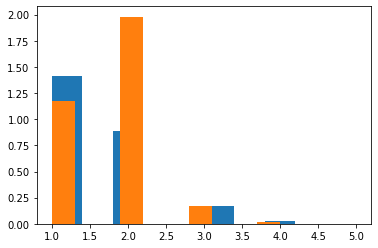

In [63]:
print("\nQuantidades de cada classe:")
print(data_fill.loc[:, 'classe'].value_counts())
h = plt.hist(data_fill.loc[:, 'classe'], density=True)

print("\nQuantidades de cada classe em Paraná:")
print(data_fill.loc[data_fill['UF']=='PARANÁ', 'classe'].value_counts())
h = plt.hist(data_fill.loc[data_fill['UF']=='PARANÁ', 'classe'], density=True)